In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = (12,5)

path = "../processed/weather_master.csv"

if not os.path.exists(path):
    print("Processed file not found. Falling back to raw historical.")
    path = "../data/historical_weather.csv"

df = pd.read_csv(path)

df.head()


,city,latitude,longitude,timestamp,temperature_°c,humidity_%,pressure_hpa,wind_speed_m/s,wind_direction_°,cloudiness_%,visibility_m,source
0,Indore,22.7196,75.8577,2025-11-09 00:00:00,13.6,65,1015.8,5.1,63,0,10000.0,Open-Meteo
1,Indore,22.7196,75.8577,2025-11-09 01:00:00,13.5,63,1016.4,4.9,62,0,10000.0,Open-Meteo
2,Indore,22.7196,75.8577,2025-11-09 02:00:00,15.2,56,1017.2,5.6,65,0,10000.0,Open-Meteo
3,Indore,22.7196,75.8577,2025-11-09 03:00:00,18.0,48,1017.7,4.4,60,0,10000.0,Open-Meteo
4,Indore,22.7196,75.8577,2025-11-09 04:00:00,21.3,35,1018.1,4.3,57,0,10000.0,Open-Meteo


In [2]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

# Convert timestamp to datetime
timestamp_cols = [c for c in df.columns if "timestamp" in c.lower()]
if timestamp_cols:
    ts_col = timestamp_cols[0]
    df[ts_col] = pd.to_datetime(df[ts_col], errors="coerce")
    print(f"\nUsing timestamp column: {ts_col}")
else:
    print("\nNo timestamp column found!")

print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False))

# drop duplicates
dupes = df.duplicated().sum()
print(f"\nDuplicates removed: {dupes}")
df = df.drop_duplicates().reset_index(drop=True)


Shape: (646, 12)

Columns: ['city', 'latitude', 'longitude', 'timestamp', 'temperature_°c', 'humidity_%', 'pressure_hpa', 'wind_speed_m/s', 'wind_direction_°', 'cloudiness_%', 'visibility_m', 'source']

Data Types:
city                 object
latitude            float64
longitude           float64
timestamp            object
temperature_°c      float64
humidity_%            int64
pressure_hpa        float64
wind_speed_m/s      float64
wind_direction_°      int64
cloudiness_%          int64
visibility_m        float64
source               object
dtype: object

Using timestamp column: timestamp

Missing values:
city                0
latitude            0
longitude           0
timestamp           0
temperature_°c      0
humidity_%          0
pressure_hpa        0
wind_speed_m/s      0
wind_direction_°    0
cloudiness_%        0
visibility_m        0
source              0
dtype: int64

Duplicates removed: 0


In [3]:
temp_cols = [c for c in df.columns if "temperature" in c.lower()]
print("Temperature columns:", temp_cols)

if temp_cols:
    df[temp_cols].describe()
else:
    print("No temperature column found!")


Temperature columns: ['temperature_°c']


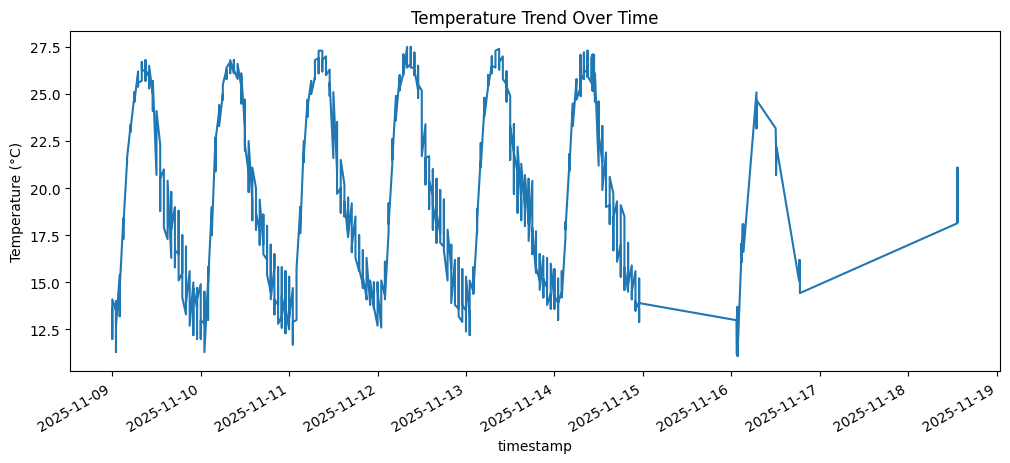

In [4]:
if timestamp_cols and temp_cols:
    df_sorted = df.sort_values(ts_col)
    df_sorted.set_index(ts_col)[temp_cols[0]].plot(
        title="Temperature Trend Over Time"
    )
    plt.ylabel("Temperature (°C)")
    plt.show()
else:
    print("Cannot plot temperature trend — missing timestamp or temperature.")


Humidity cols: ['humidity_%']
Pressure cols: ['pressure_hpa']
Wind cols: ['wind_speed_m/s', 'wind_direction_°']


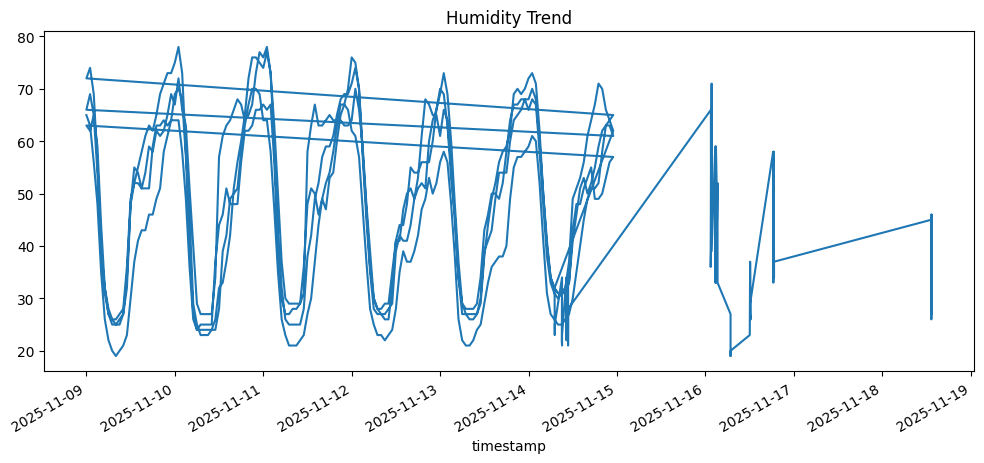

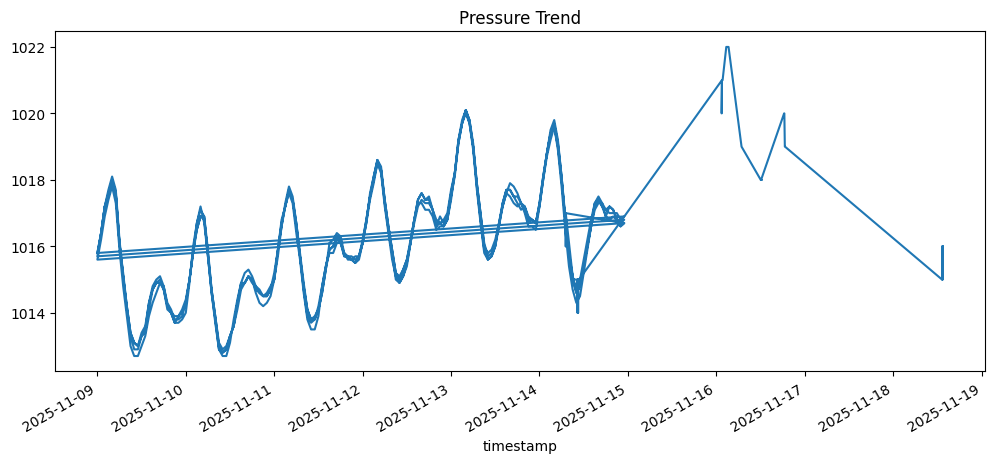

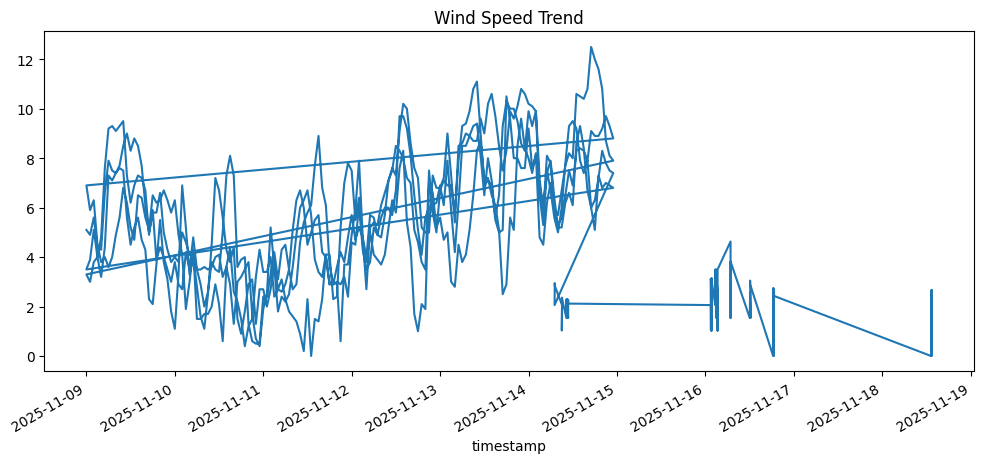

In [5]:
humidity_cols = [c for c in df.columns if "humidity" in c.lower()]
pressure_cols = [c for c in df.columns if "pressure" in c.lower()]
wind_cols = [c for c in df.columns if "wind" in c.lower()]

print("Humidity cols:", humidity_cols)
print("Pressure cols:", pressure_cols)
print("Wind cols:", wind_cols)

# Humidity trend
if humidity_cols:
    df.set_index(ts_col)[humidity_cols[0]].plot(title="Humidity Trend")
    plt.show()

# Pressure trend
if pressure_cols:
    df.set_index(ts_col)[pressure_cols[0]].plot(title="Pressure Trend")
    plt.show()

# Wind speed trend
wind_speed_cols = [c for c in df.columns if "speed" in c.lower()]
if wind_speed_cols:
    df.set_index(ts_col)[wind_speed_cols[0]].plot(title="Wind Speed Trend")
    plt.show()


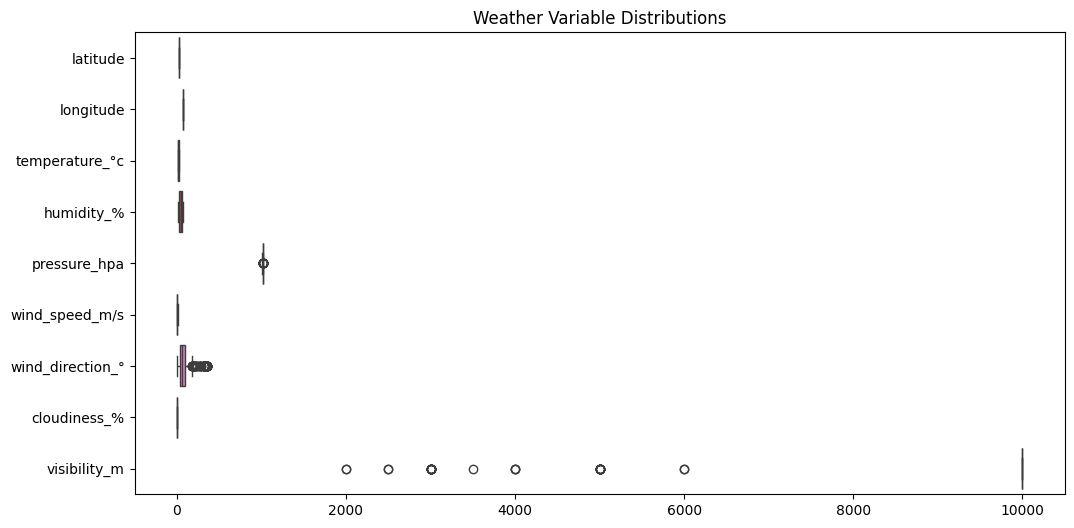

In [6]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Weather Variable Distributions")
plt.show()


In [7]:
df['date'] = df[ts_col].dt.date

daily_weather = df.groupby('date')[num_cols].median().reset_index()

os.makedirs("../results", exist_ok=True)
daily_weather.to_csv("../results/weather_daily_median.csv", index=False)

print("Saved → ../results/weather_daily_median.csv")


Saved → ../results/weather_daily_median.csv
